In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings(action='ignore')
news = pd.read_excel('~/NewsResult_20220701-20220731.xlsx')

In [3]:
news_key = news[['일자', '언론사', '키워드']]

In [4]:
news_key

,일자,언론사,키워드
0,20220731,아주경제,"지정,中企,적합,업종,대리,운전,기사,거리,반쪽짜리,지정,中企,적합,업종,대리운전업..."
1,20220731,헤럴드경제,"젤렌스키,곡물,수확량,평년,절반,러시아,우크라이나,침공,식량,가격,상승,압력,볼로디..."
2,20220731,머니투데이,"원희룡,심야,택시,대란,해결,개인택시,부제,부제,해제,지자체,권한,서울,인천,경기,..."
3,20220731,파이낸셜뉴스,"창업자,시야,리포트,의사,결정,글로벌,진출,기업,컨설팅,황태성,일본,회계,법인,대표..."
4,20220731,머니투데이,"대리운전연합,집회,예고,티맵,사업,확장,행위,대리운전업계,전국,집회,예고,대리,운전..."
...,...,...,...
2899,20220701,매일경제,"한국표준협회,개최,서비스위크,한국,서비스,대상,한국표준협회,회장,강명수,지난달,3일..."
2900,20220701,파이낸셜뉴스,"퓨리나,지속가능,실천,반려동물,Weekend,반려,동물,퓨리,그루넨워드,인터뷰,AO..."
2901,20220701,아주경제,"위너,송민호,독보,분위기,메종,마르지엘라,30일,서울,중구,롯데백화점,본점,행사,메..."
2902,20220701,아주경제,"MAXQ,대한생활체육골프협회,MAXQ,생활,체육,골프,협회,MOU,체결,30일,봄스..."


In [6]:
news_key_lis = news_key['키워드'].tolist()

In [8]:
topic_key = []
topic_value = []

for word in news_key_lis:
    word = word.split(',') #' ,' 기점으로 스트링 분리
    topic_key.append(word) #분리된 단어들을 리스트에 새로 정렬   

for i in range(len(topic_key)):
    for word in topic_key[i]:
        word = word.split(' ') #' '를 기점으로 스트링 분리
        topic_value.append(word) #제거된 리스트를 새로운 리스트에 삽입

topic_value     

[['지정'],
 ['中企'],
 ['적합'],
 ['업종'],
 ['대리'],
 ['운전'],
 ['기사'],
 ['거리'],
 ['반쪽짜리'],
 ['지정'],
 ['中企'],
 ['적합'],
 ['업종'],
 ['대리운전업계'],
 ['반발'],
 ['동반위'],
 ['권고'],
 ['티맵'],
 ['강행'],
 ['로지'],
 ['인수'],
 ['나서'],
 ['공유'],
 ['동반'],
 ['중재'],
 ['결의대회'],
 ['전국'],
 ['단위'],
 ['결의'],
 ['대회'],
 ['동반성장위원회'],
 ['서울'],
 ['중구'],
 ['동반'],
 ['성장'],
 ['위원회'],
 ['한국대리운전총연합회'],
 ['관계자'],
 ['시위'],
 ['사진'],
 ['한국대리운전총연합회'],
 ['공유'],
 ['대기업'],
 ['시장'],
 ['침탈'],
 ['대리운전업'],
 ['중소기업적합업종'],
 ['지정'],
 ['대리'],
 ['운전'],
 ['기사'],
 ['운전대'],
 ['거리'],
 ['적합업종'],
 ['대기업'],
 ['전화콜'],
 ['시장'],
 ['신규'],
 ['진출'],
 ['제한'],
 ['권고안'],
 ['업계'],
 ['해석'],
 ['시장'],
 ['보호'],
 ['업계'],
 ['한국대리운전총연합회'],
 ['한국플랫폼운전자노동조합'],
 ['한국대리운전협동조합'],
 ['단체'],
 ['동반'],
 ['성장'],
 ['위원회'],
 ['동반위'],
 ['SK'],
 ['티맵모빌리티'],
 ['티맵모빌리티'],
 ['시위'],
 ['이날'],
 ['대리운전업'],
 ['대리'],
 ['운전업'],
 ['동반위'],
 ['실무'],
 ['소위원회'],
 ['시위'],
 ['대리운전기사들'],
 ['동반위'],
 ['신청단체'],
 ['반대'],
 ['대기업'],
 ['티맵모빌리티'],
 ['로지소프트'],
 ['인수'],
 ['전화콜'],
 ['시장'],
 ['진출'],
 ['규제'],
 ['시장'],
 

In [9]:
topic_words = {}
for k in range(len(topic_value)):
    for i in topic_value[k]:
        if i not in topic_words:
            topic_words[i] = 1 #최초 언어
        else:
            topic_words[i] += 1 #중복 언어
print(topic_words)

{'지정': 364, '中企': 12, '적합': 73, '업종': 85, '대리': 66, '운전': 50, '기사': 179, '거리': 142, '반쪽짜리': 3, '대리운전업계': 2, '반발': 49, '동반위': 13, '권고': 59, '티맵': 10, '강행': 9, '로지': 2, '인수': 354, '나서': 3, '공유': 310, '동반': 63, '중재': 22, '결의대회': 7, '전국': 259, '단위': 97, '결의': 25, '대회': 71, '동반성장위원회': 4, '서울': 1005, '중구': 134, '성장': 1136, '위원회': 432, '한국대리운전총연합회': 6, '관계자': 846, '시위': 13, '사진': 458, '대기업': 87, '시장': 2100, '침탈': 1, '대리운전업': 3, '중소기업적합업종': 1, '운전대': 5, '적합업종': 1, '전화콜': 7, '신규': 539, '진출': 483, '제한': 199, '권고안': 9, '업계': 645, '해석': 100, '보호': 323, '한국플랫폼운전자노동조합': 1, '한국대리운전협동조합': 1, '단체': 132, 'SK': 260, '티맵모빌리티': 13, '이날': 737, '운전업': 4, '실무': 62, '소위원회': 1, '대리운전기사들': 1, '신청단체': 2, '반대': 86, '로지소프트': 11, '규제': 608, '유리': 47, '입장': 290, '한정': 27, '정작': 9, '관장': 16, '통제': 69, '시장확장': 1, '지적': 372, '본회의': 15, '중기': 13, '의결': 76, '합의': 232, '진입': 139, '자제': 34, '확장': 389, '현금': 52, '프로모션': 28, '플랫폼': 1506, '영역': 260, '포함': 507, '홍보': 192, '처우': 8, '개선': 624, '복지': 88, '향상': 198, '협의체': 80, '100

In [11]:
word_df = pd.DataFrame(topic_words.items()) #딕셔너리 --> 데이터 프레임 
word_df.columns = ['단어', '빈도'] #칼럼 명 설정
topic_word_df = word_df.sort_values(['빈도'],ascending = False).head(20) #빈도 기준 내림차순 정렬 및 상위 20개만 추출
topic_word_df

,단어,빈도
330,기업,3196
312,서비스,3143
336,대표,2628
350,사업,2355
36,시장,2100
276,제공,1726
651,정부,1694
329,글로벌,1575
150,한국,1508
81,플랫폼,1506


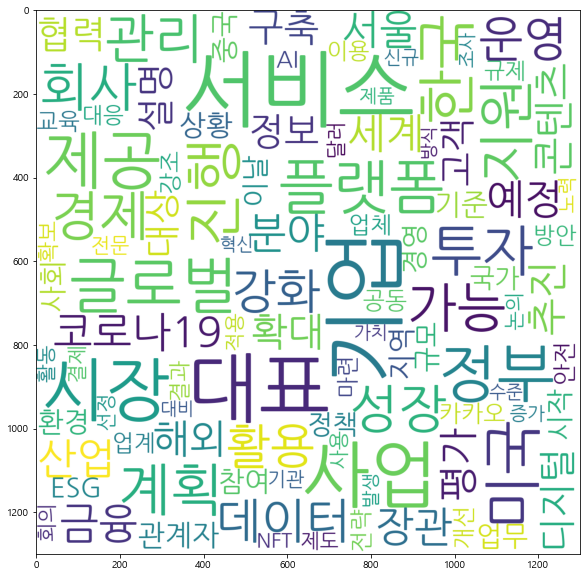

In [22]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path = 'C:/Users/day1/Downloads/나눔 글꼴/나눔고딕/NanumGothic.ttf',
                     background_color = "white",
                     width = 1300,
                     height = 1300,
                     max_words = 100,
                     max_font_size = 200).generate_from_frequencies(topic_words)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)

plt.show()